<font size = 8 color ='336EFF'>kNN</font>



---
### Héctor Hibran Tapia Fernández - A01661114
---

Import Relevant Libraries


---



In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

Import MNIST dataset


---



In [2]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version = 1, as_frame = False)
mnist.keys()

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

Separate in data(X) and target(y)


---



In [3]:
X, y = mnist['data'], mnist['target']

In [4]:
print(X.shape) #  70,000 samples and 784 features per sample

(70000, 784)


70,000 rows, with each row representing one flattened grayscale image of a handwritten digit. Each image is 28x28 pixels, and these are flattened into a 1D array of 784 features (28 pixels * 28 pixels = 784 features).

In [5]:
print(y.shape) # 70,000 labels

(70000,)


'y' correspond to the labels of the images, where each label is the digit that the image represents. This array has 70,000 entries, one for each image.

Plot the image one random number (remember to reshape)


---



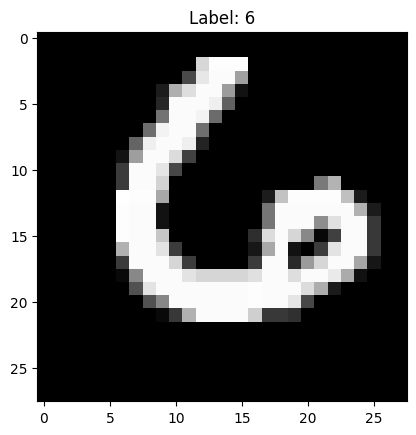

In [6]:
random = random.randint(0, len(X) - 1) # counts the lenght of X and subtracts 1
random_image = X[random].reshape(28, 28)

plt.imshow(random_image, cmap = 'gray')
plt.title(f'Label: {y[random]}')
plt.show()

Split data in train (first 60,000) and test (the rest 10,000)



---



In [7]:
X_train = X[:60000]
y_train = y[:60000]

X_test = X[60000:]
y_test = y[60000:]

### Train a kNN classifier

Set parameters weights = 'distance' and n_neighbors = 4



---



In [8]:
from sklearn.neighbors import KNeighborsClassifier

kNN_classifier = KNeighborsClassifier(n_neighbors = 4, weights = 'distance')

kNN_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4, weights='distance')

Predict the test dataset and print the confusion matrix



---



In [9]:
y_pred = kNN_classifier.predict(X_test)

Plot the confusion matrix



---



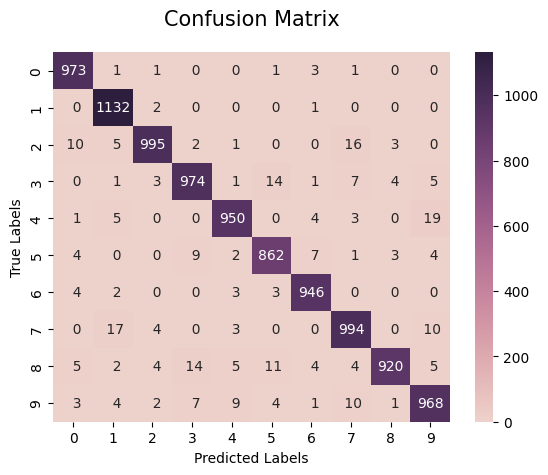

In [10]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

# Etiquetas para los dígitos del MNIST (del 0 al 9)
labels = [str(i) for i in range(10)]

sns.heatmap(cm, annot = True, fmt = '3.0f', xticklabels = labels, yticklabels = labels, cmap = sns.cubehelix_palette(as_cmap = True))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix', y = 1.05, size = 15)
plt.show()

In [11]:
correct_predictions = np.trace(cm)
print("Total number of correct predictions:", correct_predictions, "of 10,000.")

Total number of correct predictions: 9714 of 10,000.


Print the the accuracy score, precision score, recall score, f1 score(for the last three use parameter average = None)



---



In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

- **Accuracy (Exactitud)**: Es la proporción de predicciones correctas entre el total de predicciones.

In [13]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9714


- **Precision (Precisión)**: Mide la exactitud de las predicciones positivas. En este contexto, sería la proporción de predicciones correctas para cada dígito sobre el total de predicciones para ese dígito.

In [14]:
precision = precision_score(y_test, y_pred, average = None) # no usa promedio global, usa métricas para cada numero del 0 al 9
print("Precision:", precision)

Precision: [0.973      0.96834902 0.98417409 0.96819085 0.97535934 0.96312849
 0.97828335 0.95945946 0.98818475 0.95746785]



- **Recall (Recuperación)**: Mide la capacidad del modelo para detectar todas las instancias positivas. En MNIST, sería cuántas instancias de cada dígito fueron correctamente identificadas.

In [15]:
recall = recall_score(y_test, y_pred, average = None) # no usa promedio global, usa métricas para cada numero del 0 al 9
print("Recall:", recall)

Recall: [0.99285714 0.99735683 0.96414729 0.96435644 0.96741344 0.96636771
 0.9874739  0.96692607 0.94455852 0.95936571]


- **F1 Score**: Es el promedio armónico de la precisión y la recuperación, proporcionando un balance entre estas dos métricas.

In [16]:
f1 = f1_score(y_test, y_pred, average = None) # no usa promedio global, usa métricas para cada numero del 0 al 9
print("F1 Score:", f1)

F1 Score: [0.98282828 0.98263889 0.97405776 0.96626984 0.97137014 0.96474538
 0.98285714 0.96317829 0.96587927 0.95841584]


Import shift from scipy.ndimage.interpolation to do data aumentation in for directions dx and dy = ((1, 0), (-1, 0), (0, 1), (0, -1))



---



In [17]:
from scipy.ndimage.interpolation import shift

def shift_image(image, dx, dy):

    image = image.reshape((28, 28))
    shifted_image = shift(image, [dy, dx], cval = 0, mode = 'constant')
    return shifted_image.reshape([-1])

shifts = [(1, 0), (-1, 0), (0, 1), (0, -1)] # Directions to shift: up, down, left, right

<ipython-input-17-0cadcd2dac8a>:1: DeprecationWarning: Please use `shift` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  from scipy.ndimage.interpolation import shift


Pasos:

1. `image.reshape((28, 28))`: Como la imagen del MNIST viene aplanada (784 elementos en un array 1D), primero la reorganiza en una forma 2D de 28x28 píxeles para que se parezca a una imagen real.

2. `shifted_image = shift(image, [dy, dx], cval = 0, mode = 'constant')`: Utiliza la función `shift` de `scipy.ndimage.interpolation` para desplazar la imagen. `[dy, dx]` indica cuántos píxeles mover la imagen en cada dirección. `cval = 0` configura los valores de los píxeles que entran en la imagen como resultado del desplazamiento a 0 (generalmente negro para imágenes en escala de grises). `mode = 'constant'` indica que los píxeles que se desplazan fuera de los bordes de la imagen se llenarán con un valor constante (en este caso, 0 debido a `cval = 0`).

3. `return shifted_image.reshape([-1])`: La imagen desplazada se vuelve a aplanar a una matriz 1D antes de devolverla.

Train a new classifier with the augmented data



---



Construyendo el nuevo dataset augmentado...

In [18]:
augmented_images = [] # Lista que guardara cada imagen en 1D
augmented_labels = [] # Lista que guardara cada label en 1D

for dx, dy in shifts: # Itera sobre cada desplazamiento en shifts
    for image, label in zip(X_train, y_train): # Itera sobre cada imagen, y etiqueta en X_train y y_train
        shifted_image = shift_image(image, dx, dy) # Aplica el desplazamiento a cada imagen, usando la funcion ya definida
        augmented_images.append(shifted_image) # Guarda la imagen 1D en la lista 1D
        augmented_labels.append(label) # Guarda el label en la lista

# Convierte las listas de datos aumentados en matrices
augmented_images = np.array(augmented_images)
augmented_labels = np.array(augmented_labels)

# Combina datos originales y aumentados
X_train_augmented = np.concatenate([X_train, augmented_images])
y_train_augmented = np.concatenate([y_train, augmented_labels])

Pasamos de 70,000 a 240,000 samples, mismos features.

In [19]:
print(augmented_images.shape)

(240000, 784)


Tenemos nuestros 240,000 labels, que servirán como targets que ayudarán a verificar el si el modelo predijo de manera correcta cada número.

In [20]:
print(augmented_labels.shape)

(240000,)


In [21]:
kNN_classifier_augmented = KNeighborsClassifier(n_neighbors = 4, weights = 'distance')

kNN_classifier_augmented.fit(X_train_augmented, y_train_augmented)

KNeighborsClassifier(n_neighbors=4, weights='distance')

Predict with test dataset



---



In [22]:
y_pred_augmented = kNN_classifier_augmented.predict(X_test)

Calculate the accuracy score, print confusion matrix and plot confusion matrix



---



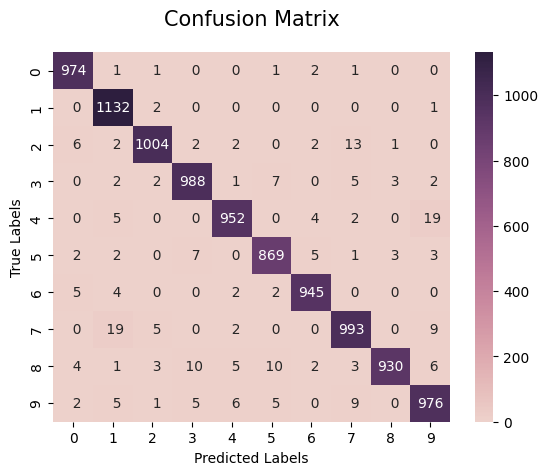

In [23]:
cm_augmented = confusion_matrix(y_test, y_pred_augmented)

# Etiquetas para los dígitos del MNIST (del 0 al 9)
labels = [str(i) for i in range(10)]

sns.heatmap(cm_augmented, annot = True, fmt = '3.0f', xticklabels = labels, yticklabels = labels, cmap = sns.cubehelix_palette(as_cmap = True))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix', y = 1.05, size = 15)
plt.show()

In [24]:
correct_predictions_augmented = np.trace(cm_augmented)
print("Total number of correct predictions:", correct_predictions_augmented, "of 10,000.")

Total number of correct predictions: 9763 of 10,000.


In [25]:
accuracy_augmented = accuracy_score(y_test, y_pred_augmented)
print("Accuracy:", accuracy_augmented)

Accuracy: 0.9763


In [26]:
precision_augmented = precision_score(y_test, y_pred_augmented, average = None) # no usa promedio global, usa métricas para cada numero del 0 al 9
print("Precision:", precision_augmented)

Precision: [0.98086606 0.96504689 0.98624754 0.97628458 0.9814433  0.97203579
 0.984375   0.96689387 0.99252935 0.96062992]


In [27]:
recall_augmented = recall_score(y_test, y_pred_augmented, average = None) # no usa promedio global, usa métricas para cada numero del 0 al 9
print("Recall:", recall_augmented)

Recall: [0.99387755 0.99735683 0.97286822 0.97821782 0.9694501  0.97421525
 0.98643006 0.96595331 0.95482546 0.96729435]


In [28]:
f1_augmented = f1_score(y_test, y_pred_augmented, average = None) # no usa promedio global, usa métricas para cada numero del 0 al 9
print("F1 Score:", f1_augmented)

F1 Score: [0.98732894 0.98093588 0.9795122  0.97725025 0.97540984 0.9731243
 0.98540146 0.96642336 0.9733124  0.96395062]


### Dataset: MINST, Model: kNN, Without data augmentation, 70000 samples

```
Total number of correct predictions: 9714 of 10,000.
```

### Dataset: MINST, Model: kNN With data augmentation, 240000 samples

```
Total number of correct predictions: 9763 of 10,000.
```



En este caso estamos utilizando el mismo conjunto de datos de prueba (`X_test`) que se utilizó para evaluar el clasificador kNN original. El propósito de usar el mismo `X_test` es comparar el rendimiento del clasificador entrenado con los datos originales frente al clasificador entrenado con datos aumentados, manteniendo constante el conjunto de prueba.

La idea es evaluar cómo la augmentación de datos (en este caso, desplazamientos de imagen) en el conjunto de entrenamiento afecta la capacidad del modelo para generalizar a datos no vistos. Lo que mejoró un 0.504% el rendimiento, la augmentación ha ayudado al modelo a aprender características más robustas y generalizables.